In [43]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
## Reading the data
df = pd.read_csv('unemployment2020.csv')

In [45]:
## Checking the columns present in the data
df.columns

Index(['States', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude'],
      dtype='object')

In [46]:
df.shape

(267, 9)

In [47]:
## Checking the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   States                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region                                    267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [48]:
## Checking the head of the data
df.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


# **Data Pre-Processing**

In [49]:
## Renaming columns for ease of use
df.rename(columns={' Estimated Labour Participation Rate (%)': 'Labor_Participation_Rate'}, inplace=True)
df.rename(columns={' Date': 'Date'}, inplace=True)
df.rename(columns={' Frequency': 'Frequency'}, inplace=True)
df.rename(columns={' Estimated Unemployment Rate (%)': 'Unemployment_Rate'}, inplace=True)
df.rename(columns={' Estimated Employed': 'Employed'}, inplace=True)
df.rename(columns={'longitude': 'Longitude'}, inplace=True)
df.rename(columns={'latitude': 'Latitude'}, inplace=True)

In [50]:
df.columns

Index(['States', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labor_Participation_Rate', 'Region', 'Longitude', 'Latitude'],
      dtype='object')

In [51]:
## Making a separate column for month

import datetime as dt
import calendar

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

In [52]:
df.columns

Index(['States', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labor_Participation_Rate', 'Region', 'Longitude', 'Latitude',
       'Month_int', 'Month_name'],
      dtype='object')

In [53]:
df.drop(columns='Month_name', inplace=True)

In [54]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
num_cols = [feature for feature in df.columns if feature not in cat_cols]

## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['Date', 'Unemployment_Rate', 'Employed', 'Labor_Participation_Rate', 'Longitude', 'Latitude', 'Month_int']

Categorical columns: ['States', 'Frequency', 'Region']


In [55]:
## Finding the unique values in the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

States:
Number of unique values in the States: 27
Unique values: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


Frequency:
Number of unique values in the Frequency: 1
Unique values: [' M']


Region:
Number of unique values in the Region: 5
Unique values: ['South' 'Northeast' 'East' 'West' 'North']




In [56]:
## Checking for missing values in the dataset
df.isnull().sum()

States                      0
Date                        0
Frequency                   0
Unemployment_Rate           0
Employed                    0
Labor_Participation_Rate    0
Region                      0
Longitude                   0
Latitude                    0
Month_int                   0
dtype: int64

In [57]:
df_copy = df.copy()

# **ENCODING**

In [58]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=60, dtype=np.int64)

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [59]:
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {df[feature].nunique()}")
    print(f"Unique values: {df[feature].unique()}")
    print('\n')

States:
Number of unique values in the States: 27
Unique values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


Frequency:
Number of unique values in the Frequency: 1
Unique values: [0]


Region:
Number of unique values in the Region: 5
Unique values: [3 2 0 4 1]




# **Data Exploration**

In [60]:
## Summary of stats of the data
df.describe()

,States,Date,Frequency,Unemployment_Rate,Employed,Labor_Participation_Rate,Region,Longitude,Latitude,Month_int
count,267.000000,267,267.0,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000,267.000000
mean,12.962547,2020-06-16 09:15:30.337078528,0.0,12.236929,1.396211e+07,41.681573,2.003745,22.826048,80.532425,5.535581
min,0.000000,2020-01-31 00:00:00,0.0,0.500000,1.175420e+05,16.770000,0.000000,10.850500,71.192400,1.000000
25%,6.000000,2020-03-31 00:00:00,0.0,4.845000,2.838930e+06,37.265000,1.000000,18.112400,76.085600,3.000000
50%,13.000000,2020-06-30 00:00:00,0.0,9.650000,9.732417e+06,40.390000,2.000000,23.610200,79.019300,6.000000
75%,20.000000,2020-08-31 00:00:00,0.0,16.755000,2.187869e+07,44.055000,3.000000,27.278400,85.279900,8.000000
max,26.000000,2020-10-31 00:00:00,0.0,75.850000,5.943376e+07,69.690000,4.000000,33.778200,92.937600,10.000000
std,7.819781,NaN,0.0,10.803283,1.336632e+07,7.845419,1.369644,6.270731,5.831738,2.870915


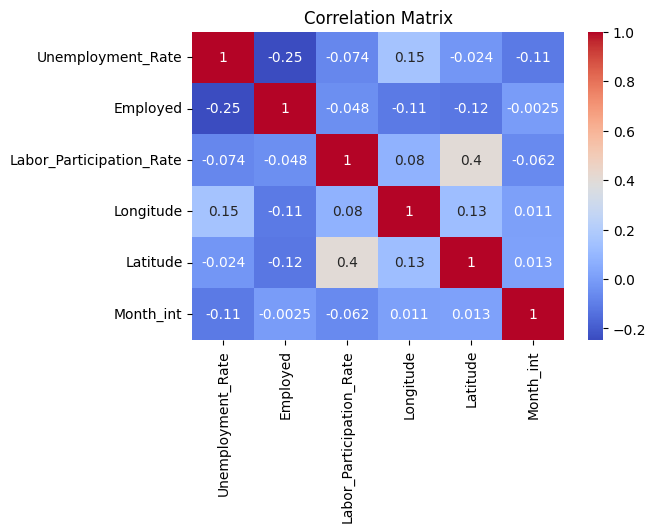

In [113]:
## Correlation analysis of the data
hm = df[['Unemployment_Rate', 'Employed', 'Labor_Participation_Rate', 'Longitude', 'Latitude', 'Month_int']]
correlation_matrix = hm.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Data Visualization**

NUMERICAL FEATURES

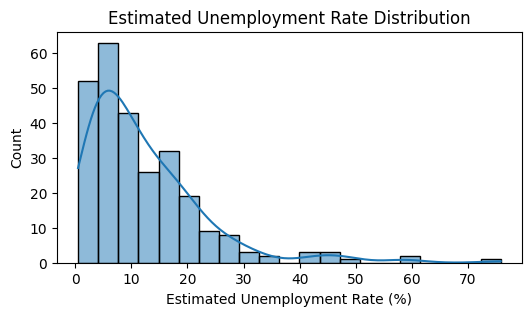

In [62]:
## Histplot for Estimated Unemployment Rate (%)
plt.figure(figsize=(6, 3))
sns.histplot(df['Unemployment_Rate'], kde=True)
plt.title('Estimated Unemployment Rate Distribution')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.show()

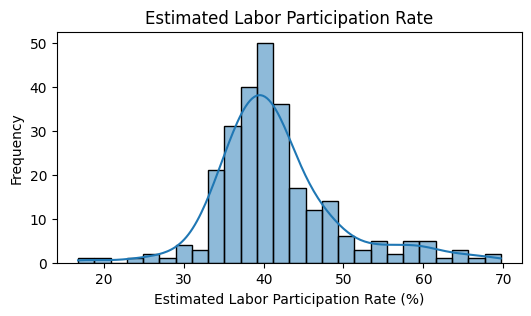

In [63]:
## Histplot for Estimated abor Participation Rate (%)
plt.figure(figsize=(6, 3))
sns.histplot(df['Labor_Participation_Rate'], kde=True)
plt.title('Estimated Labor Participation Rate')
plt.xlabel('Estimated Labor Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

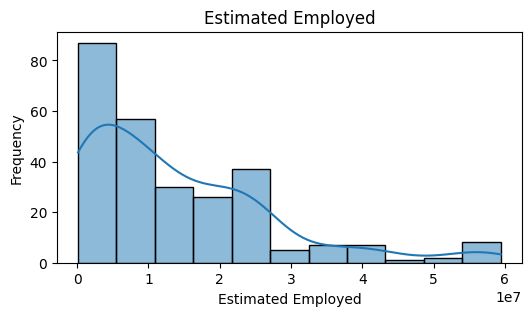

In [64]:
## Histplot for Estimated Employed
plt.figure(figsize=(6, 3))
sns.histplot(df['Employed'], kde=True)
plt.title('Estimated Employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')
plt.show()

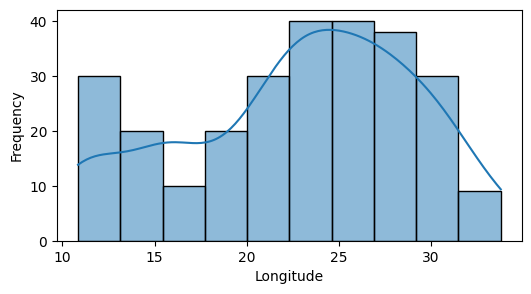

In [65]:
## Histplot for Longitude
plt.figure(figsize=(6, 3))
sns.histplot(df['Longitude'], kde=True)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

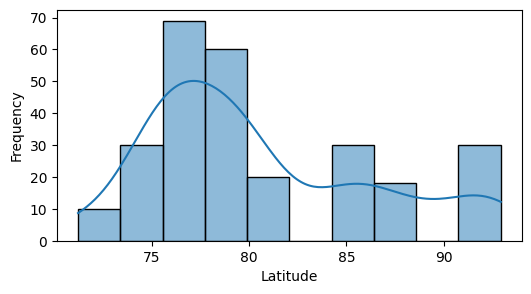

In [66]:
## Histplot for Latitude
plt.figure(figsize=(6, 3))
sns.histplot(df['Latitude'], kde=True)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

CATEGORICAL FEATURES

C:\Users\fatim\AppData\Local\Temp\ipykernel_17140\2367026293.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




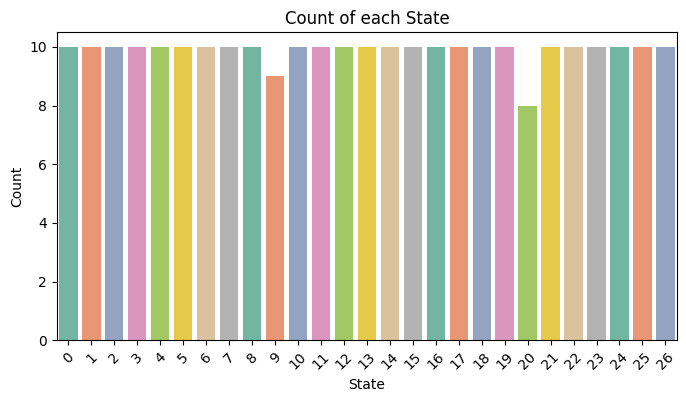

In [97]:
## Barplot for 'States'
count = df['States'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=count.index, y=count.values, palette='Set2')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of each State')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

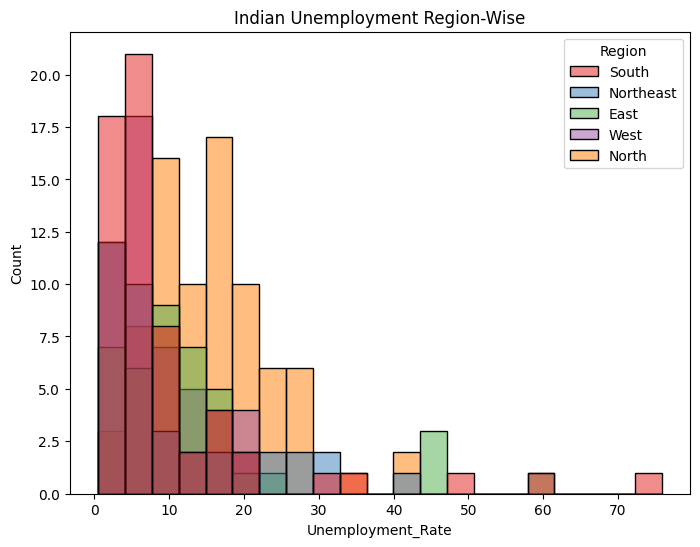

In [100]:
##Region-wise unemployment histogram

plt.figure(figsize=(8, 6))
plt.title("Indian Unemployment Region-Wise")
sns.histplot(x="Unemployment_Rate", hue="Region", data=df_copy, palette='Set1')
plt.show()

In [71]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [101]:
# Scatter matrix considering the employed, unemployed and labor participation rates based on region

fig = px.scatter_matrix(df_copy, template='plotly',
                        dimensions=['Unemployment_Rate', 'Employed', 'Labor_Participation_Rate'],
                        color='Region')
fig.update_layout(width=1000, height=600)
fig.show()

In [102]:
## Boxplot for Unemployment rate per State

fig = px.box(df_copy, x='States', y='Unemployment_Rate', color='States', title='Unemployment rate per State', template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [105]:
## Bar chart showing  unemployment rate across regions from Jan. 2020 to Oct. 2020

fig = px.bar(df_copy, x='Region', y='Unemployment_Rate', animation_frame='Month_int', color='States',
             title='Unemployment rate across regions from Jan. 2020 to Oct. 2020', height=700, template='seaborn')

# Updating the x-axis category order to be in descending total
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Adjusting the animation frame duration
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.update_layout(width=1100, height=550)
fig.show()

In [106]:
## Sunburst chart showing unemployment rate in each Region and State

# Creating a DataFrame with relevant columns
unemployed_df = df_copy[['States', 'Region', 'Unemployment_Rate', 'Employed', 'Labor_Participation_Rate']]

unemployed = unemployed_df.groupby(['Region', 'States'])['Unemployment_Rate'].mean().reset_index()

# Creating a Sunburst chart 
fig = px.sunburst(unemployed, path=['Region', 'States'], values='Unemployment_Rate', color_continuous_scale='rdylbu',
                  title='Unemployment rate in each Region and State', height=550, template='presentation')

fig.update_layout(width=600, height=600)
fig.show()


In [107]:
## Smatter plot showing the impact of lockdown on employment in each region

fig = px.scatter_geo(df_copy,'Longitude', 'Latitude', color="Region",
                     hover_name="States", size="Unemployment_Rate",
                     animation_frame="Month_int",scope='asia',template='seaborn',title='Impack of lockdown on Employement across regions')

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000

fig.update_geos(lataxis_range=[5,35], lonaxis_range=[65, 100],oceancolor="#3399FF", showocean=True)

fig.update_layout(width=800, height=500)
fig.show()


The northern regions of India seems to have more unemployed people.

# **Model Training**

In [114]:
## Splitting the train data into X_train and y_train
X = df[['Unemployment_Rate', 'Employed', 'Labor_Participation_Rate', 'Longitude', 'Latitude', 'Month_int']]   
y = df['Unemployment_Rate']

In [115]:
## Importing different model classes from the scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

In [117]:
## Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
## Training the dataset on different algorithms

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg.predict(X_test_scaled)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test_scaled)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test_scaled)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_predictions = rf_reg.predict(X_test)

# K-Nearest Neighbors (KNN) Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_scaled, y_train)
knn_reg_predictions = knn_reg.predict(X_test_scaled)

# Neural Network Regression
nn_reg = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42)
nn_reg.fit(X_train_scaled, y_train)
nn_reg_predictions = nn_reg.predict(X_test_scaled)

# **Model Evaluation**

In [119]:
# Evaluate the models
def evaluate_model(model, model_name, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"------------------------------------")


evaluate_model(linear_reg, "Linear Regression", X_test_scaled, y_test)
evaluate_model(ridge_reg, "Ridge Regression", X_test_scaled, y_test)
evaluate_model(lasso_reg, "Lasso Regression", X_test_scaled, y_test)
evaluate_model(rf_reg, "Random Forest Regression", X_test, y_test)
evaluate_model(knn_reg, "K-Nearest Neighbors (KNN) Regression", X_test_scaled, y_test)
evaluate_model(nn_reg, "Neural Network Regression", X_test_scaled, y_test)

Linear Regression:
Mean Squared Error: 0.00
R-squared: 1.00
------------------------------------
Ridge Regression:
Mean Squared Error: 0.00
R-squared: 1.00
------------------------------------
Lasso Regression:
Mean Squared Error: 0.79
R-squared: 0.99
------------------------------------
Random Forest Regression:
Mean Squared Error: 0.16
R-squared: 1.00
------------------------------------
K-Nearest Neighbors (KNN) Regression:
Mean Squared Error: 10.63
R-squared: 0.89
------------------------------------
Neural Network Regression:
Mean Squared Error: 0.07
R-squared: 1.00
------------------------------------


# **Result**

**Since we know that a lower MSE and and values of R^2 closer to 1 determine the best fit, the most suitable Machine Learning algorithm to predict Umemployment Rate using the given features is---------->** 

## **"LINEAR REGRESSION & RIDGE REGRESSION"**